# Customer Segmentation using Unsupervised Learning #
### Unsupervised Algorithms in Machine Learning ###
### CU Boulder MSDS program ###
### JRB ###

In this project we will investigate different unsupervised learning algorims in solving the problem of clustering customers based on basic data collected including gender, age, annual income and spending score (based on how much money they spent in the mall in a particular timeframe).

The data comes courtesy of a local marketing agency in my home town, they allowed me to share the data anonimously. You can find the data in this link: https://github.com/jackraiferbaruch/unsupervised_machine_learning/blob/main/customer_data.csv.

During this project, I will be testing 4 different unsupervised clustering models:

- KMeans - centroid-based clustering algorithm that partitions data into K clusters by iteratively assigning each data point to the nearest centroid and updating centroids to minimize the within-cluster sum of squares.
- KNN/DBSCAN - density-based clustering algorithm that groups together closely packed data points into clusters while identifying noise points as outliers based on specified distance and density parameters.
- Agglomerative Modeling - hierarchical clustering technique that iteratively merges the closest clusters based on a specified linkage criterion until reaching a stopping condition, producing a dendrogram representing the cluster hierarchy.
- Gaussian Mixture Model - probabilistic model that represents the distribution of data as a mixture of multiple Gaussian distributions, allowing for flexible modeling of complex data distributions.

I will also be using Silhouette Score to compare them. The silhouette score quantifies the compactness and separation of clusters in a clustering result, providing a measure of how well-defined the clusters are. It evaluates each data point based on its distance to other points in its own cluster compared to points in neighboring clusters, with scores ranging from -1 (poor clustering) to 1 (well-separated clusters).

### About the Dataset ###

The dataset contains 5000 rows of data from surveys made at a local mall. It contains the following information:
- Gender - Male or Female, filled by survey taker.
- Age - Self reported age of customer.
- Annual Income in Thousands - Self reported by customer.
- Spending Score - Score based on how often the customers visits and makes purchases at the mall, self reported.

In [1]:
# Import the basic libraries to read and plot the data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset into a Dataframe
df = pd.read_csv('customer_data.csv')

### Basic EDA ###

Some basic EDA (Exploratory Data Analysis) to understand the data and it's distribution.

In [3]:
df.head()

,CustomerID,Gender,Age,"Annual Income ($1,000)",Spending Score (1-100)
0,1,Female,31,10,21
1,2,Male,18,10,77
2,3,Male,34,174,67
3,4,Male,49,14,33
4,5,Female,45,25,69


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              5000 non-null   int64 
 1   Gender                  5000 non-null   object
 2   Age                     5000 non-null   int64 
 3   Annual Income ($1,000)  5000 non-null   int64 
 4   Spending Score (1-100)  5000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 195.4+ KB


In [5]:
df.describe()

,CustomerID,Age,"Annual Income ($1,000)",Spending Score (1-100)
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,38.535200,55.524400,49.617600
std,1443.520003,11.704638,57.799934,18.542096
min,1.000000,18.000000,7.000000,1.000000
25%,1250.750000,30.000000,17.000000,37.000000
50%,2500.500000,38.000000,36.000000,49.000000
75%,3750.250000,47.000000,72.000000,62.000000
max,5000.000000,78.000000,300.000000,100.000000


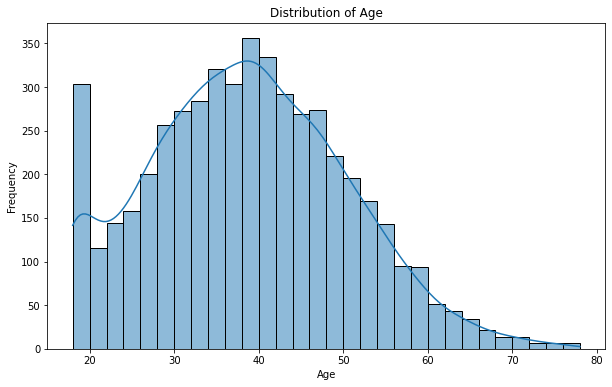

In [6]:
# Distribution of Age

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

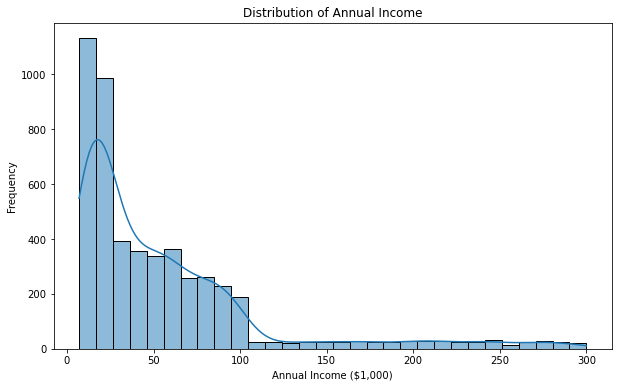

In [7]:
# Distribution of Annual Income

plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income ($1,000)'], bins=30, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income ($1,000)')
plt.ylabel('Frequency')
plt.show()

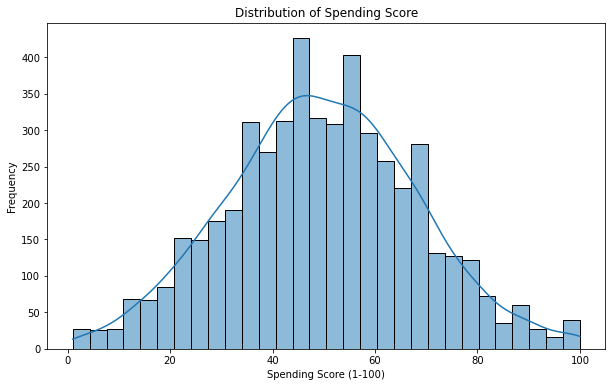

In [8]:
# Distribution of Spending Score

plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score (1-100)'], bins=30, kde=True)
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

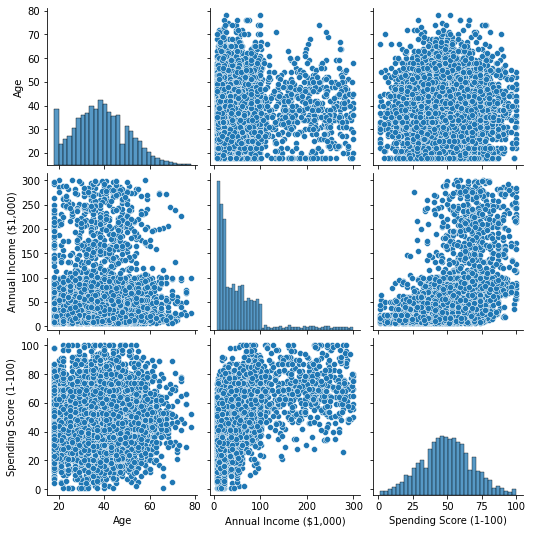

In [9]:
# Pairplot to see the relationships

sns.pairplot(df[['Age', 'Annual Income ($1,000)', 'Spending Score (1-100)']])
plt.show()

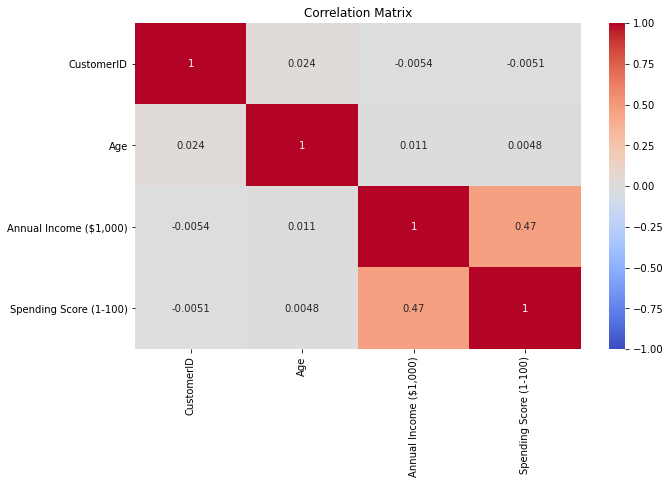

In [10]:
# Correlation matrix

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Data Preprocessing ###

To prepare the data for our models we will use the Standard Scaler from Sklearn to normalize all of the fratures. Also notice we removed the ID feature from the data since it gives us no important information. We also use the label encoder to encode the Gender feature into a numeric value.

In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding the 'Gender' column
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Selecting features for clustering
features = ['Gender', 'Age', 'Annual Income ($1,000)', 'Spending Score (1-100)']

# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Convert the scaled data back to a DataFrame for easier manipulation
df_scaled = pd.DataFrame(df_scaled, columns=features)

### KMeans Model ###

First, we will build the KMeans model since I believe it will perform as best as possible on this data.

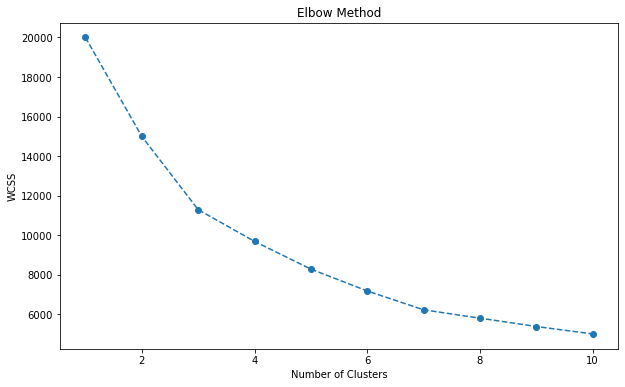

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=52)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Optimal number of clusters (determined from the elbow graph, let's say it's 5)
optimal_clusters = 5

# Applying K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# Adding the cluster labels to the original dataframe
df['Cluster'] = cluster_labels

Silhouette Score: 0.27079790422527505


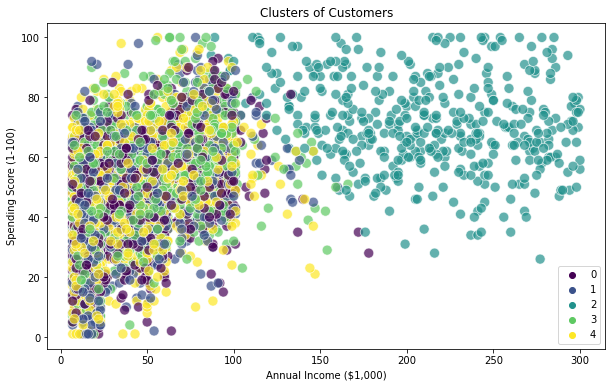

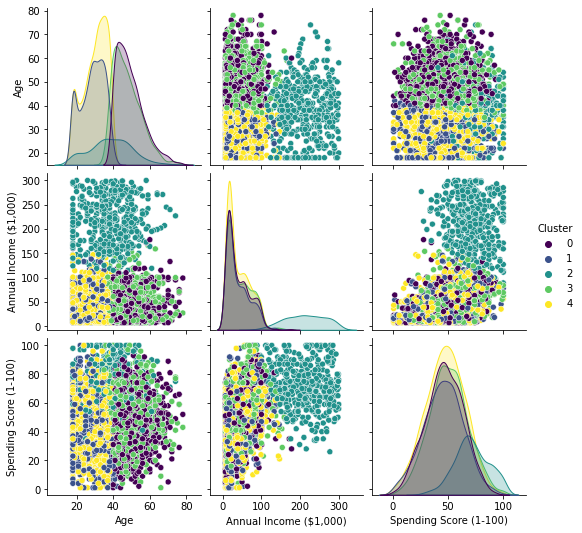

In [13]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income ($1,000)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income ($1,000)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Visualizing the clusters in a pair plot
sns.pairplot(df, hue='Cluster', vars=['Age', 'Annual Income ($1,000)', 'Spending Score (1-100)'], palette='viridis')
plt.show()

A silhouette score of 0.27 suggests that the clusters are somewhat separated but still overlap to some extent, indicating moderate clustering quality. However, the fact that three of the four clusters appear messy suggests that the model may not be fully capturing the underlying structure of the data. It could be worth investigating further to understand why these clusters are messy and whether alternative clustering algorithms or parameter adjustments could improve the clustering results.

### DBSCAN Model ###

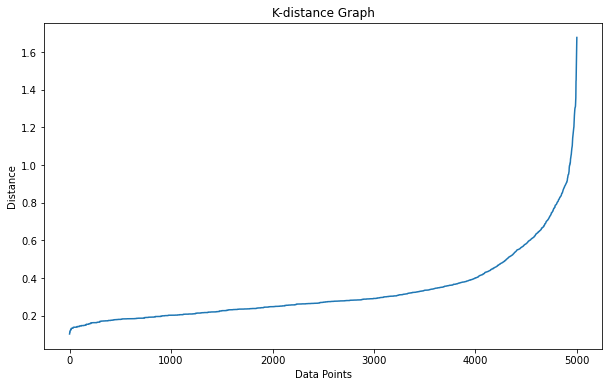

Estimated number of clusters: 6
Estimated number of noise points: 448


In [14]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import numpy as np

# Finding the optimal number of neighbors using the nearest neighbors graph
nn_graph = NearestNeighbors(n_neighbors=10)
nn_graph.fit(df_scaled)
distances, indices = nn_graph.kneighbors(df_scaled)

# Plotting the K-distance graph
plt.figure(figsize=(10, 6))
plt.plot(np.sort(distances[:, -1]))
plt.title('K-distance Graph')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# From the K-distance graph, determine the optimal epsilon for DBSCAN
# Let's say the optimal epsilon is around 0.5
optimal_epsilon = 0.5

# Applying DBSCAN with the optimal epsilon
dbscan = DBSCAN(eps=optimal_epsilon, min_samples=10)
cluster_labels = dbscan.fit_predict(df_scaled)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise_ = list(cluster_labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Adding the cluster labels to the original dataframe
df['Cluster'] = cluster_labels

In [15]:
# Filter out noise points (-1)
clustered_points = df_scaled[cluster_labels != -1]
filtered_labels = cluster_labels[cluster_labels != -1]

# Calculate silhouette score
silhouette_avg = silhouette_score(clustered_points, filtered_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.30004340491196557


The DBSCAN model performed slightly better, however not by much. It seems that 3 of the 4 clusters are fairly hard to separate in general. We will now try hirerichical models and see if we get better (or worse) results.

### Agglomerative Clustering ###

Silhouette Score: 0.22934356392510136


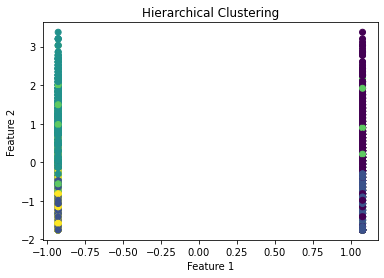

In [16]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=5, linkage='ward')

# Fit the model to the data
cluster_labels = model.fit_predict(df_scaled)

# Evaluate the model using silhouette score
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
print("Silhouette Score:", silhouette_avg)

df_scaled_array = df_scaled.to_numpy()

# Visualize the clusters (assuming 2D data)
plt.scatter(df_scaled_array[:, 0], df_scaled_array[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

This model performed significantly worse than the previous two models. It would seem Hirerchichal clustering is not a good solution for this particular problem.

### Gaussian Mixture Model ###

Silhouette Score: 0.2181346371099451


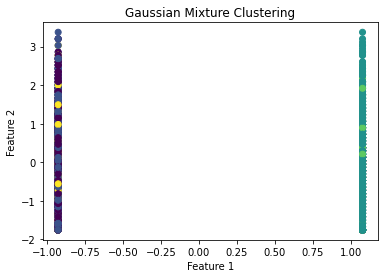

In [18]:
from sklearn.mixture import GaussianMixture

# Initialize the Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, random_state=42)

# Fit the model to the data
gmm.fit(df_scaled)

# Predict the cluster labels
cluster_labels = gmm.predict(df_scaled)

# Evaluate the model using silhouette score
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
print("Silhouette Score:", silhouette_avg)

df_scaled_array = df_scaled.to_numpy()

# Visualize the clusters (assuming 2D data)
plt.scatter(df_scaled_array[:, 0], df_scaled_array[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Gaussian Mixture Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

The Gaussian Mixture model was the worst performer of all, confirming this is not a good model for customer segmentation based on the available data.

| Unsupervised Model | Silhouette Score |
|--------------------|------------------|
|KMeans|0.27079790422527505|
|DBSCAN|0.30004340491196557|
|Agglomerative Clustering|0.22934356392510136|
|Gaussian Mixture Model|0.2181346371099451|

## Conclusions ##

Based on the silhouette scores obtained for each unsupervised clustering model:

- DBSCAN achieved the highest silhouette score of 0.30, indicating the best clustering quality among the models evaluated. This suggests that DBSCAN was able to identify well-separated clusters in the data, making it a promising choice for customer segmentation.

- KMeans follows with a silhouette score of 0.27, which indicates moderate clustering quality. While KMeans may have identified some meaningful clusters, the silhouette score suggests that there may be overlapping or less well-defined clusters compared to DBSCAN.

- Agglomerative Clustering and Gaussian Mixture Model both achieved silhouette scores below 0.25, indicating relatively poor clustering quality compared to the other models. These models may have struggled to identify meaningful clusters in the data or resulted in clusters with significant overlap.

In conclusion, based solely on silhouette scores, DBSCAN appears to be the most promising model for customer segmentation in this scenario. However, it's essential to consider other factors such as interpretability, computational efficiency, and domain knowledge when selecting the final clustering algorithm for your specific application. Additionally, further analysis and validation may be needed to confirm the meaningfulness of the clusters identified by the chosen model.
